# Introduction
The data for this project is pulled from a Netflix dataset on Kaggle. Its purpose is to visualize which countries produce the most content on Netflix.

## Importing the data
Start by bringing in the CSV data into Python program. We then parse the data using the CSV package. Lastly we close the CSV file after we have read the information.

In [1]:
import matplotlib.pyplot as plt
import csv
from collections import Counter

In [2]:
with open('data/netflix_titles.csv', 'r', encoding ='utf-8') as file:
    netflix_data = csv.DictReader(file)
    data_list = []

    for row in netflix_data:
        data_list.append(row)

### Test to see if data is being read properly

In [3]:
data_list[0]

{'show_id': '81145628',
 'type': 'Movie',
 'title': 'Norm of the North: King Sized Adventure',
 'director': 'Richard Finn, Tim Maltby',
 'cast': 'Alan Marriott, Andrew Toth, Brian Dobson, Cole Howard, Jennifer Cameron, Jonathan Holmes, Lee Tockar, Lisa Durupt, Maya Kay, Michael Dobson',
 'country': 'United States, India, South Korea, China',
 'date_added': 'September 9, 2019',
 'release_year': '2019',
 'rating': 'TV-PG',
 'duration': '90 min',
 'listed_in': 'Children & Family Movies, Comedies',
 'description': 'Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first.'}

## Format the data before we create a visualization
Create a list of countries in which movies and shows were produced and count the number of productions for each country.

In [4]:
country_list = []

for entry in data_list:
    country_names = entry['country'].split(", ")
    if country_names[0] == "":
        continue
    for country in country_names:
        country_list.append(country)
        
production_totals = dict(Counter(country_list))
print(production_totals)

{'United States': 2609, 'India': 838, 'South Korea': 162, 'China': 120, 'United Kingdom': 601, 'Spain': 178, 'Bulgaria': 8, 'Canada': 318, 'Chile': 23, 'Denmark': 38, 'Sweden': 33, 'Netherlands': 37, 'Belgium': 66, 'France': 271, 'Uruguay': 9, 'United States,': 1, 'Thailand': 56, 'Pakistan': 23, 'Turkey': 87, 'Brazil': 66, 'Italy': 67, 'Indonesia': 52, 'Ireland': 33, 'Hong Kong': 97, 'Morocco': 6, 'Mexico': 129, 'Vietnam': 4, 'Argentina': 68, 'Nigeria': 36, 'Japan': 231, 'Germany': 151, 'Greece': 8, 'Norway': 21, 'Switzerland': 15, 'United Arab Emirates': 21, 'Lebanon': 9, 'Cambodia': 3, 'Russia': 21, 'Poland': 26, 'Israel': 26, 'Australia': 126, 'Portugal': 4, 'Egypt': 54, 'Taiwan': 75, 'Austria': 10, 'Czech Republic': 15, 'Senegal': 2, 'Soviet Union': 3, 'Peru': 9, 'Ukraine': 3, 'Malaysia': 21, 'South Africa': 30, 'Nepal': 2, 'Philippines': 47, 'Serbia': 5, 'Colombia': 36, 'Singapore': 30, 'Luxembourg': 7, 'West Germany': 5, 'Cayman Islands': 1, 'New Zealand': 23, 'Venezuela': 3, 'Jo

### Sort production_totals by descending values

In [5]:
productions_sorted = {}
sorted_countries = sorted(production_totals, key=production_totals.get, reverse=True)

for w in sorted_countries:
    productions_sorted[w] = production_totals[w]

print(productions_sorted)

{'United States': 2609, 'India': 838, 'United Kingdom': 601, 'Canada': 318, 'France': 271, 'Japan': 231, 'Spain': 178, 'South Korea': 162, 'Germany': 151, 'Mexico': 129, 'Australia': 126, 'China': 120, 'Hong Kong': 97, 'Turkey': 87, 'Taiwan': 75, 'Argentina': 68, 'Italy': 67, 'Belgium': 66, 'Brazil': 66, 'Thailand': 56, 'Egypt': 54, 'Indonesia': 52, 'Philippines': 47, 'Denmark': 38, 'Netherlands': 37, 'Nigeria': 36, 'Colombia': 36, 'Sweden': 33, 'Ireland': 33, 'South Africa': 30, 'Singapore': 30, 'Poland': 26, 'Israel': 26, 'Chile': 23, 'Pakistan': 23, 'New Zealand': 23, 'Norway': 21, 'United Arab Emirates': 21, 'Russia': 21, 'Malaysia': 21, 'Switzerland': 15, 'Czech Republic': 15, 'Austria': 10, 'Uruguay': 9, 'Lebanon': 9, 'Peru': 9, 'Finland': 9, 'Bulgaria': 8, 'Greece': 8, 'Luxembourg': 7, 'Morocco': 6, 'Jordan': 6, 'Iceland': 6, 'Qatar': 6, 'Romania': 6, 'Serbia': 5, 'West Germany': 5, 'Hungary': 5, 'Vietnam': 4, 'Portugal': 4, 'Iran': 4, 'Croatia': 4, 'Cambodia': 3, 'Soviet Union'

### Narrow down results to 10 countries with highest production values, so they will all fit on graph

In [6]:
top10 = dict(list(productions_sorted.items())[0: 10])
print(top10)

top10r = dict(sorted(top10.items(), key=lambda item: item[1]))
print(top10r)


{'United States': 2609, 'India': 838, 'United Kingdom': 601, 'Canada': 318, 'France': 271, 'Japan': 231, 'Spain': 178, 'South Korea': 162, 'Germany': 151, 'Mexico': 129}
{'Mexico': 129, 'Germany': 151, 'South Korea': 162, 'Spain': 178, 'Japan': 231, 'France': 271, 'Canada': 318, 'United Kingdom': 601, 'India': 838, 'United States': 2609}


## Create a graph
Display the data we collected on a graph using matplotlib.

<BarContainer object of 10 artists>

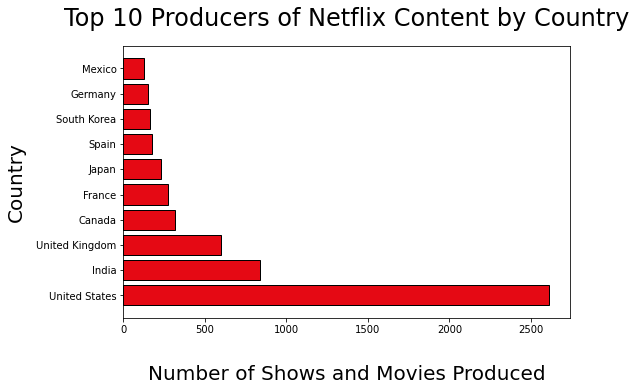

In [7]:
plt.figure(figsize=(8, 5))
plt.title("Top 10 Producers of Netflix Content by Country", fontsize=24, pad=20)
plt.xlabel("Number of Shows and Movies Produced", labelpad=30, fontsize=20)
plt.ylabel("Country", labelpad=10, fontsize=20)

# Create x axis labels
x = []
for k, v in top10.items():
    x.append(v)
    
# Create y axis labels
y = []
for k, v in top10.items():
    y.append(k)

plt.barh(y, x, color='#E50914', edgecolor='black')

## Graph Analysis
The US produces much more content than any other country. This is unsurprising given Netflix is an American company. However, Netflix is available internationally. This is indicative of the global popularity of American media. This may also have sociological implications such as the globalization of American culture and values. Also worth noting is that the top 4 countries are English-speaking countries. People who wish to work in the industry can increase their chances by learning English and moving to these countries.